In [3]:
#Skealern:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve,roc_curve, roc_auc_score
from sklearn import metrics
#Keras:
import keras
from keras.models import Sequential
from keras.layers import Dense
#Pandas:
import pandas as pd
#Plotting:
import matplotlib.pyplot as plt

banknoteDataFrame=pd.read_csv('/kaggle/input/data-banknote-authentication/data_banknote_authentication.txt')
"""
Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)
"""

banknoteDataFrame.columns =['variance of Wavelet Transformed image', 'skewness of Wavelet Transformed image', 'curtosis of Wavelet Transformed image', 'entropy of image','class']
banknoteDataFrame = banknoteDataFrame.drop_duplicates()
banknoteDataFrame.describe()


,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,0.443427,1.904023,1.416711,-1.169247,0.452858
std,2.862660,5.867888,4.328442,2.086559,0.497958
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.787300,-1.648200,-1.543900,-2.393100,0.000000
50%,0.518000,2.330000,0.614060,-0.578890,0.000000
75%,2.852200,6.794450,3.213300,0.405155,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
#Splitting into input (x) and output(y)
y = banknoteDataFrame['class']
x =banknoteDataFrame.drop(['class'],axis = 1)
x,y

(      variance of Wavelet Transformed image  \
 0                                   4.54590   
 1                                   3.86600   
 2                                   3.45660   
 3                                   0.32924   
 4                                   4.36840   
 ...                                     ...   
 1366                                0.40614   
 1367                               -1.38870   
 1368                               -3.75030   
 1369                               -3.56370   
 1370                               -2.54190   
 
       skewness of Wavelet Transformed image  \
 0                                   8.16740   
 1                                  -2.63830   
 2                                   9.52280   
 3                                  -4.45520   
 4                                   9.67180   
 ...                                     ...   
 1366                                1.34920   
 1367                               -4

In [5]:
#Splitting into trainning and testing sets with testing size on 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
#standardizing
standardScaler = StandardScaler()
x_train = standardScaler.fit_transform(x_train)
x_test = standardScaler.transform(x_test)

In [6]:
#MLNN archticture (4,4,1)
classifier = Sequential()
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='uniform',input_dim=4))
classifier.add(Dense(4, activation = 'sigmoid', kernel_initializer = 'uniform'))
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))

#initial weights
first_layer_weights = classifier.layers[0].get_weights()[0]
first_layer_biases  = classifier.layers[0].get_weights()[1]
second_layer_weights = classifier.layers[1].get_weights()[0]
second_layer_biases  =classifier.layers[1].get_weights()[1]
third_layer_weights = classifier.layers[2].get_weights()[0]
third_layer_biases  =classifier.layers[2].get_weights()[1]

#First layer initial weights
initial_weights1 = pd.DataFrame(columns=['in1,1','in1,2','in1,3','in1,4','b1'])
initial_weights1['in1,1']=first_layer_weights.tolist()[0]
initial_weights1['in1,2']=first_layer_weights.tolist()[1]
initial_weights1['in1,3']=first_layer_weights.tolist()[2]
initial_weights1['in1,4']=first_layer_weights.tolist()[3]
initial_weights1['b1']=first_layer_biases.tolist()

#Second layer initial weights
initial_weights2 = pd.DataFrame(columns=['in2,1','in2,2','in2,3','in2,4','b2'])
initial_weights2['in2,1']=second_layer_weights.tolist()[0]
initial_weights2['in2,2']=second_layer_weights.tolist()[1]
initial_weights2['in2,3']=second_layer_weights.tolist()[2]
initial_weights2['in2,4']=second_layer_weights.tolist()[3]
initial_weights2['b2']=second_layer_biases.tolist()

#Third layer initial weights
initial_weights3 = pd.DataFrame(columns=['in3','b3'])
initial_weights3['in3']=third_layer_weights.tolist()[0]
initial_weights3['b3']=third_layer_biases.tolist()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics=['accuracy'])
training_accuracy = []
testing_accuracy = []
training_error = []
testing_error = []

2022-12-22 16:22:29.955712: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
initial_weights1

,"in1,1","in1,2","in1,3","in1,4",b1
0,0.001069,-0.004258,0.039227,-0.006620,0.0
1,-0.028738,-0.047939,-0.025245,0.043117,0.0
2,0.012112,-0.003744,-0.033657,-0.039466,0.0
3,-0.016597,-0.021129,-0.040499,0.003160,0.0


In [8]:
initial_weights2


,"in2,1","in2,2","in2,3","in2,4",b2
0,0.027791,-0.040196,-0.034959,0.016025,0.0
1,-0.006093,0.036951,-0.000522,0.007208,0.0
2,0.005387,-0.027319,0.022323,0.029631,0.0
3,-0.031166,-0.014466,0.021051,0.010334,0.0


In [9]:
initial_weights3


,in3,b3
0,-0.021312,0.0


In [10]:
for i in range(0,50):
  classifier.fit(x_train, y_train, batch_size = 10)

  y_train_pred = classifier.predict(x_train)
  y_train_pred = (y_train_pred > 0.5)

  y_test_pred = classifier.predict(x_test)
  y_test_pred = (y_test_pred > 0.5)

  y_train_predicted = pd.DataFrame(y_train_pred)
  y_test_predicted = pd.DataFrame(y_test_pred)

  training_accuracy.append(accuracy_score(y_train_predicted, y_train))
    
  testing_accuracy.append(accuracy_score(y_test_predicted, y_test))

  training_error.append(1-training_accuracy[i])
  testing_error.append(1-testing_accuracy[i])



2022-12-22 16:22:30.270781: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


95/95 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9915


In [11]:
#Final weights
first_layer_weights_final = classifier.layers[0].get_weights()[0]
first_layer_biases_final  = classifier.layers[0].get_weights()[1]
second_layer_weights_final = classifier.layers[1].get_weights()[0]
second_layer_biases_final  =classifier.layers[1].get_weights()[1]
third_layer_weights_final = classifier.layers[2].get_weights()[0]
third_layer_biases_final  =classifier.layers[2].get_weights()[1]

#First layer final weights
final_weights1 = pd.DataFrame(columns=['in1,1','in1,2','in1,3','in1,4','b1'])
final_weights1['in1,1']=first_layer_weights_final.tolist()[0]
final_weights1['in1,2']=first_layer_weights_final.tolist()[1]
final_weights1['in1,3']=first_layer_weights_final.tolist()[2]
final_weights1['in1,4']=first_layer_weights_final.tolist()[3]
final_weights1['b1']=first_layer_biases_final.tolist()

#Second final weights
final_weights2= pd.DataFrame(columns=['in2,1','in2,2','in2,3','in2,4','b2'])
final_weights2['in2,1']=second_layer_weights_final.tolist()[0]                           
final_weights2['in2,2']=second_layer_weights_final.tolist()[1]
final_weights2['in2,3']=second_layer_weights_final.tolist()[2]
final_weights2['in2,4']=second_layer_weights_final.tolist()[3]
final_weights2['b2']=second_layer_biases_final.tolist()

#Third layer initial weights
final_weights3= pd.DataFrame(columns=['in3','b3'])
final_weights3['in3']=third_layer_weights.tolist()[0]
final_weights3['b3']=third_layer_biases.tolist()



In [12]:
final_weights1

,"in1,1","in1,2","in1,3","in1,4",b1
0,2.158720,2.279256,2.123818,-0.125210,0.098496
1,-2.259510,-2.390328,-2.237060,0.143470,-0.160192
2,2.146595,2.246699,2.099290,-0.125262,0.080257
3,2.134064,2.247236,2.091119,-0.116012,0.080708


In [13]:
final_weights2

,"in2,1","in2,2","in2,3","in2,4",b2
0,2.473425,-3.062933,2.336553,2.419285,-1.626373
1,2.508750,-3.055830,2.429738,2.475932,-1.679042
2,2.525024,-3.139565,2.446116,2.502837,-1.638594
3,2.522389,-3.166050,2.484839,2.518901,-1.636371


In [14]:
final_weights3

,in3,b3
0,-0.021312,0.0


In [15]:
confusionMatrix= metrics.confusion_matrix(y_test,  y_test_pred)
print(confusionMatrix)

[[212   2]
 [  0 191]]


In [16]:
accuracyPercentage= (confusionMatrix[0,0]+confusionMatrix[1,1])/sum(sum(confusionMatrix))*100
print(accuracyPercentage)

99.50617283950616


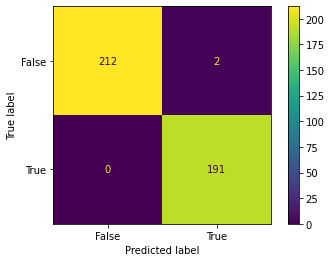

In [17]:
confusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
confusionMatrix_display.plot()
plt.show()

In [18]:
print(metrics.classification_report(y_test,y_test_predicted))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       214
           1       0.99      1.00      0.99       191

    accuracy                           1.00       405
   macro avg       0.99      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



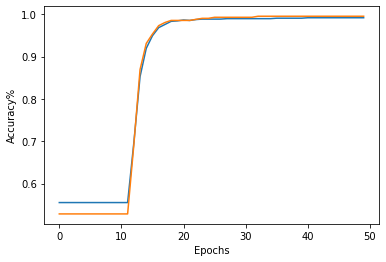

In [19]:
plt.plot(training_accuracy,label = "Training Accuracy")
plt.plot(testing_accuracy, label = "Testing Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy%')
plt.show()

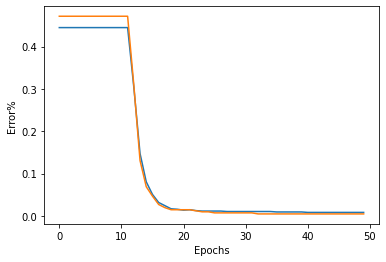

In [20]:
plt.plot(training_error,label = "Training Error")
plt.plot(testing_error, label = "Testing Error")
plt.xlabel('Epochs')
plt.ylabel('Error%')
plt.show()

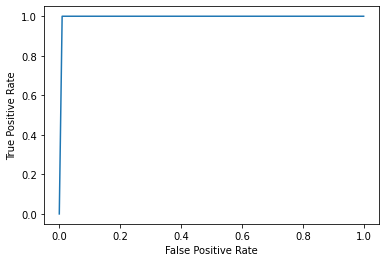

In [23]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_test_predicted)
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()